In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

In [5]:
# 넘파이 데이터 세트를 판다스 Dataframe으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data,columns = columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


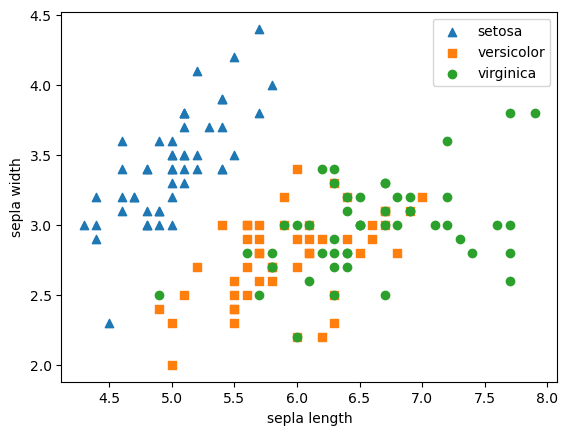

In [6]:
markers=['^','s','o']

for i , marker in enumerate(markers):
    x_axix_data =irisDF[irisDF['target']==i]['sepal_length']
    y_axix_data =irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axix_data,y_axix_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepla length')
plt.ylabel('sepla width')
plt.show()

In [7]:
# 속성값 스케일링 * 붓꽃 데이터에서 숫자가 큰 컬럼이 더 중요하다고 착각할 수있어 0-1 주변 비슷하게 조정
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 standardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환하기
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 차원

#fit() 과 transform() 호출해 pca 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
#원본을 (150,2) 데이터 세트iris_pca 객체변수로 반환해서 넘파이 행렬로 반환함 
print(iris_pca.shape)
iris_pca[:5]

(150, 2)


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [10]:
# 4개 컬럼이 압축된 새로운 2개 데이터 
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


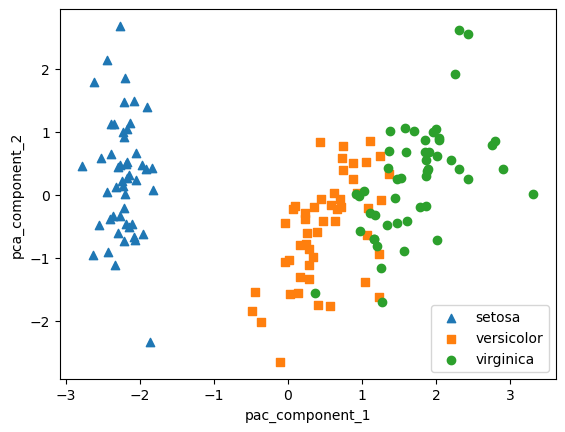

In [11]:
markers=['^','s','o']

for i , marker in enumerate(markers):
    x_axix_data =irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axix_data =irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axix_data,y_axix_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pac_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [12]:
# 전체 변동성에서 개별 pca 컴포넌트별로 차지하는 변동성 비율제공
print(pca.explained_variance_ratio_) 
#전체 데이터가 가진 변동성(정보) 73을 1이 23을 1이 96나 표현가능 

[0.72962445 0.22850762]


In [13]:
# 원본 데이터에 분류 + 검증 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
# 1,2 덩어리 공부 3번 시험 1,3덩어리 2번 시험 2 3 덩어리 1번 시험 - 교차검증 
print('원본 데이터 교차 검증 개별 정확도:)',scores)
print('원본 데이터 평균 정확도:' ,np.mean(scores))

원본 데이터 교차 검증 개별 정확도:) [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
# 4 -> 2차 pca 변환후 
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]  # 이것도 DF이네..?
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('pca변환 데이터 교차 검증 개별 정확도:)',scores_pca)
print('pca변환 데이터 평균 정확도:' ,np.mean(scores_pca))

pca변환 데이터 교차 검증 개별 정확도:) [0.88 0.88 0.88]
pca변환 데이터 평균 정확도: 0.88


In [15]:
df = pd.read_excel('default of credit card clients.xls',header=1,sheet_name='Data').iloc[0:,1:]
#header 컬럼명을 두번째 줄
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [16]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target =df['default']
X_features =df.drop('default',axis=1) # 정답제외 문제집 

<Axes: >

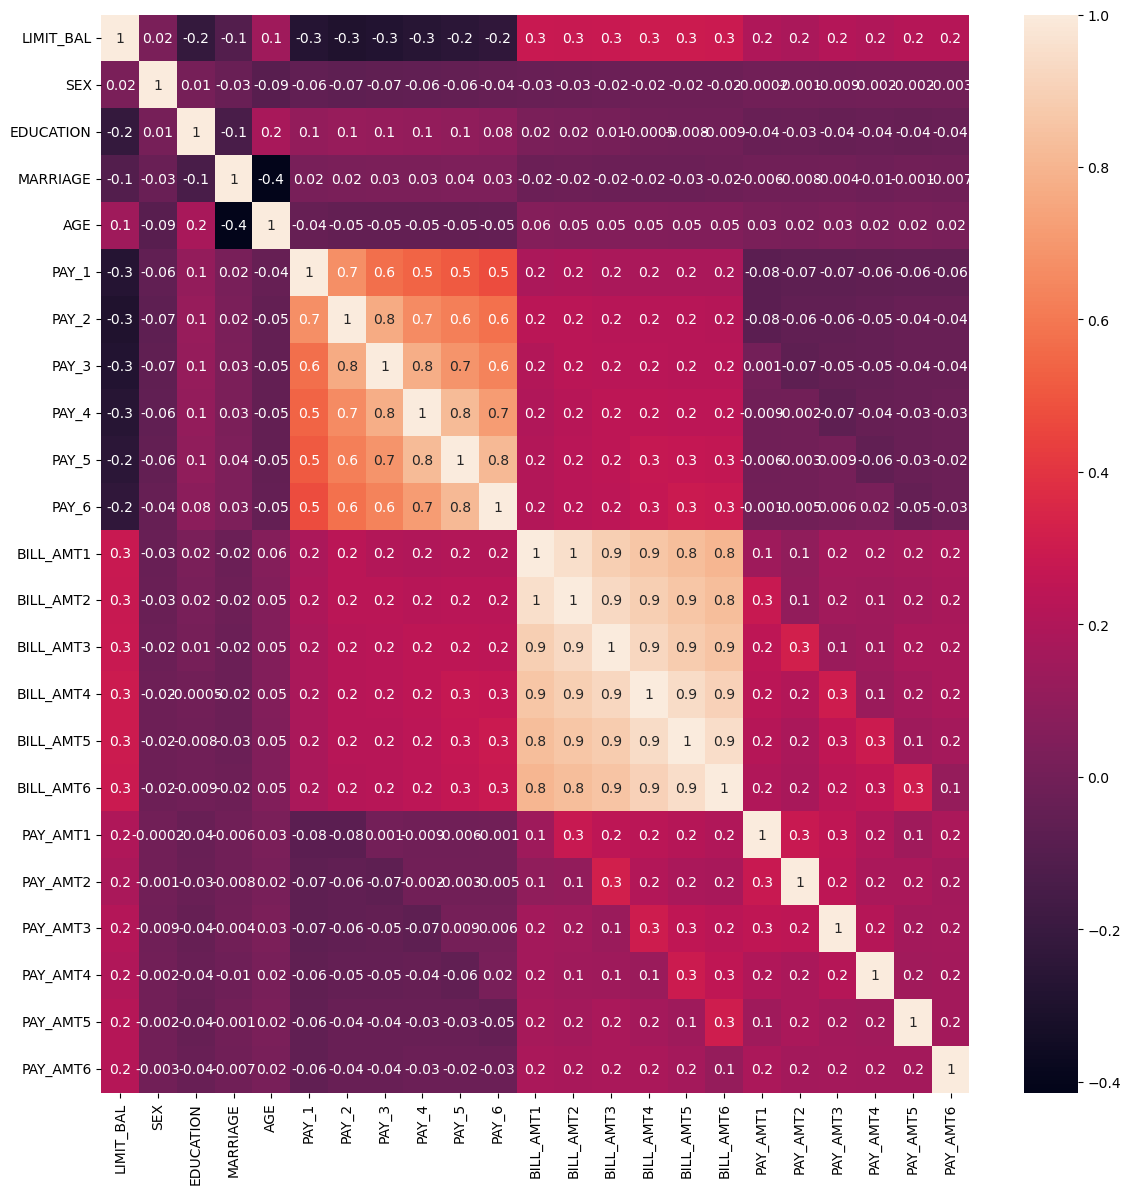

In [17]:
# 상관관계 구하기
import seaborn as sns
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [18]:
#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성 명 생성 
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)] 
print('대상 속성명 : ', cols_bill) 

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산율 위해 fit( ) 호출 
scaler = StandardScaler( ) 
#1.스케일 맞추기 
df_cols_scaled = scaler.fit_transform(X_features[cols_bill]) 
pca = PCA(n_components=2)  
#2.fit 설계도 그리기 (실제로 2차원으로 줄이진 않고 어느 바향으로 줄여야 정보를 잘 보존하는지만 그림)
#pca.fit() -> 변동성 비율 어느 정도인지 분
# pca.transform()이 설계도대로 데이터 옮기는 작업
pca.fit(df_cols_scaled) 
print('PCA Component 별 변동성 : ' ,pca.explained_variance_ratio_) 

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성 :  [0.90555253 0.0509867 ]


In [19]:
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(n_estimators=100, random_state=156) 
scores = cross_val_score(rcf, X_features, y_target , scoring='accuracy', cv=3 ) 
print( 'CV=3 인 경우의 개별 Fold세트별 정확도: ' , scores) 
print( '평균 정확도:{0: .4f}'.format (np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도:  [0.8072 0.82   0.8225]
평균 정확도: 0.8166


In [20]:
# 원본 데이터 세트에 먼저 StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 pca변환을 수행하고 cross_val_score()로 분류 예측 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, X_features, y_target , scoring='accuracy', cv=3 ) 
rcf = RandomForestClassifier(n_estimators=100, random_state=156) 
scores = cross_val_score(rcf, df_pca, y_target , scoring='accuracy', cv=3 ) 
print( 'CV=3 인 경우의 개별 Fold세트별 정확도: ' , scores) 
print( '평균 정확도:{0: .4f}'.format (np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도:  [0.7912 0.7949 0.7998]
평균 정확도: 0.7953


In [21]:
#lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target) #✔️ 지도학습이니까 target 넣어주기
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)


(150, 2)


In [22]:
lda_columns=['lda_component_1' ,'lda_component_2'] 
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns) 
irisDF_lda['target'] =iris.target 

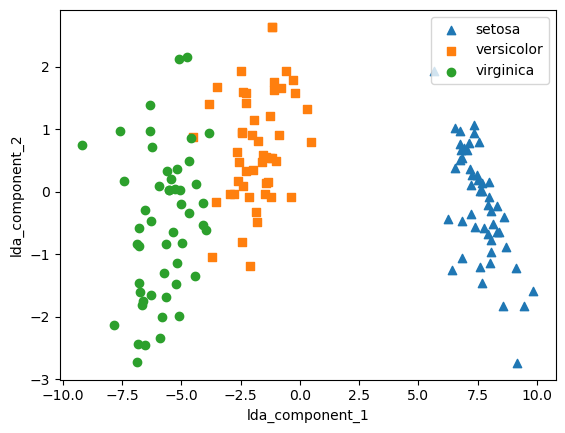

In [23]:
markers=['^','s','o']

for i , marker in enumerate(markers):
    x_axix_data =irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axix_data =irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axix_data,y_axix_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [24]:
# svd
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [25]:
U,Sigma,Vt = svd(a)
print (U.shape, Sigma.shape, Vt .shape) 
print ('U matrix:\n', np.round(U, 3)) 
print( 'Sigma Value :\n ' , np.round(Sigma, 3)) 
print ('V transpose matrix:\n', np.round(Vt, 3)) 

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value :
  [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [26]:
# sigma를 다시 0 을 포함한 대칭 행렬로 변환
Sigma_mat = np.diag(Sigma) # 대각선에만 숫자 있고 나머지는 0 으로 만
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [27]:
# 로우간의 의존성
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [28]:
# 다시 SVD 수행해 sigma값
U,Sigma,Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [31]:
# U행렬은 시그마와 내적을 수행하니까 앞 2행에 해당하는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)
a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [36]:
# Truncated SVD - 시그마 행렬에 있는 대각원소 , 즉 특이값 중 상위 일부 데이터만 추출해 분해 
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬:\n',matrix)

U,Sigma,Vt = svd(matrix,full_matrices=False) # 0 인 부분은 버림  - truncated svd 
print('분해행렬 차원:\n',U.shape,Sigma.shape,Vt.shape)


원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
분해행렬 차원:
 (6, 6) (6,) (6, 6)


In [45]:
# Truncated SVD로 Sigma행렬의 특이값을 4개로 하여 t svd 수행 
num_components = 4
U_tr , Sigma_tr,Vt_tr = svds(matrix,k=num_components) # 상위 k개만 골라 분해함

print(U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('truncated svd sigma 값 행렬 : \n',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print('\n truncate svd 로 분해 후 복원 행렬 :\n',matrix_tr)

(6, 4) (4,) (4, 6)
truncated svd sigma 값 행렬 : 
 [0.55463089 0.83865238 0.88116505 3.2535007 ]

 truncate svd 로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


Text(0, 0.5, 'TruncatedSVD Componet 2')

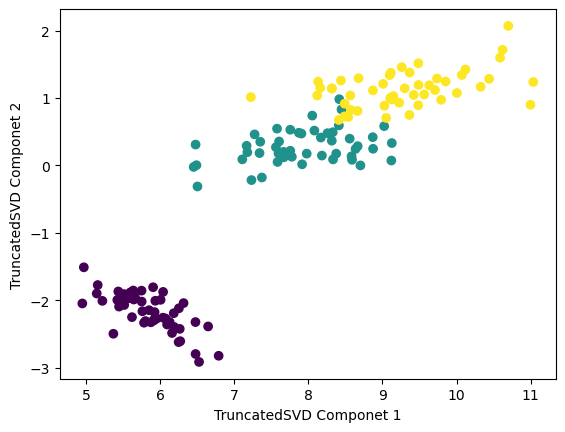

In [51]:
# 사이킷런 TruncatedSVD 클래스를 이용한 변환 
from sklearn.decomposition import TruncatedSVD,PCA

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Componet 1')
plt.ylabel('TruncatedSVD Componet 2')

In [ ]:
# NMF